# **<center>YOLOv8 Training on 15x15 box Notebook Using Google Colab<center>**

## GPU Information

In [1]:
# The provided code '!nvidia-smi' is a shell command to display information about the available GPU(s).
# It is often used to check the GPU status, including the model, memory usage, and overall performance.
!nvidia-smi

Mon Feb  5 17:42:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

 ## Install Ultralytics Library

In [2]:
!pip install ultralytics # Ultralytics is a deep learning library that provides tools for training, evaluation, and inference with various computer vision models, including YOLOv8.

## Importing Libraries and Running YOLO Checks

In [7]:
# Importing necessary libraries for YOLOv8, Roboflow, file handling, and display.
from ultralytics import YOLO
from roboflow import Roboflow
import os
import glob
from IPython.display import display, Image
from IPython import display

# Clearing the output in the IPython environment.
display.clear_output()

# Running YOLO checks using the '!yolo checks' command to ensure the YOLO environment is set up correctly.
!yolo checks

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


## Train YOLOv8 Model on Custom Dataset
### Install Roboflow and Download Dataset

In [4]:
# Installing the Roboflow library.
!pip install roboflow

# Initializing it with the provided API key.
rf = Roboflow(api_key="KzSSdC4zwdkLUo8trFov")

# Accessing the specified project and downloading the dataset using the Roboflow API.
project = rf.workspace("zoro-nhav6").project("crocomarine-project")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.9, to fix: `pip install ultralytics==8.0.196`


## YOLOv8 Training Task

In [9]:
# Initiating YOLOv8 training task on the dataset with the given parameters.
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Crocomarine-Project-4/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

## Displaying Confusion Matrix

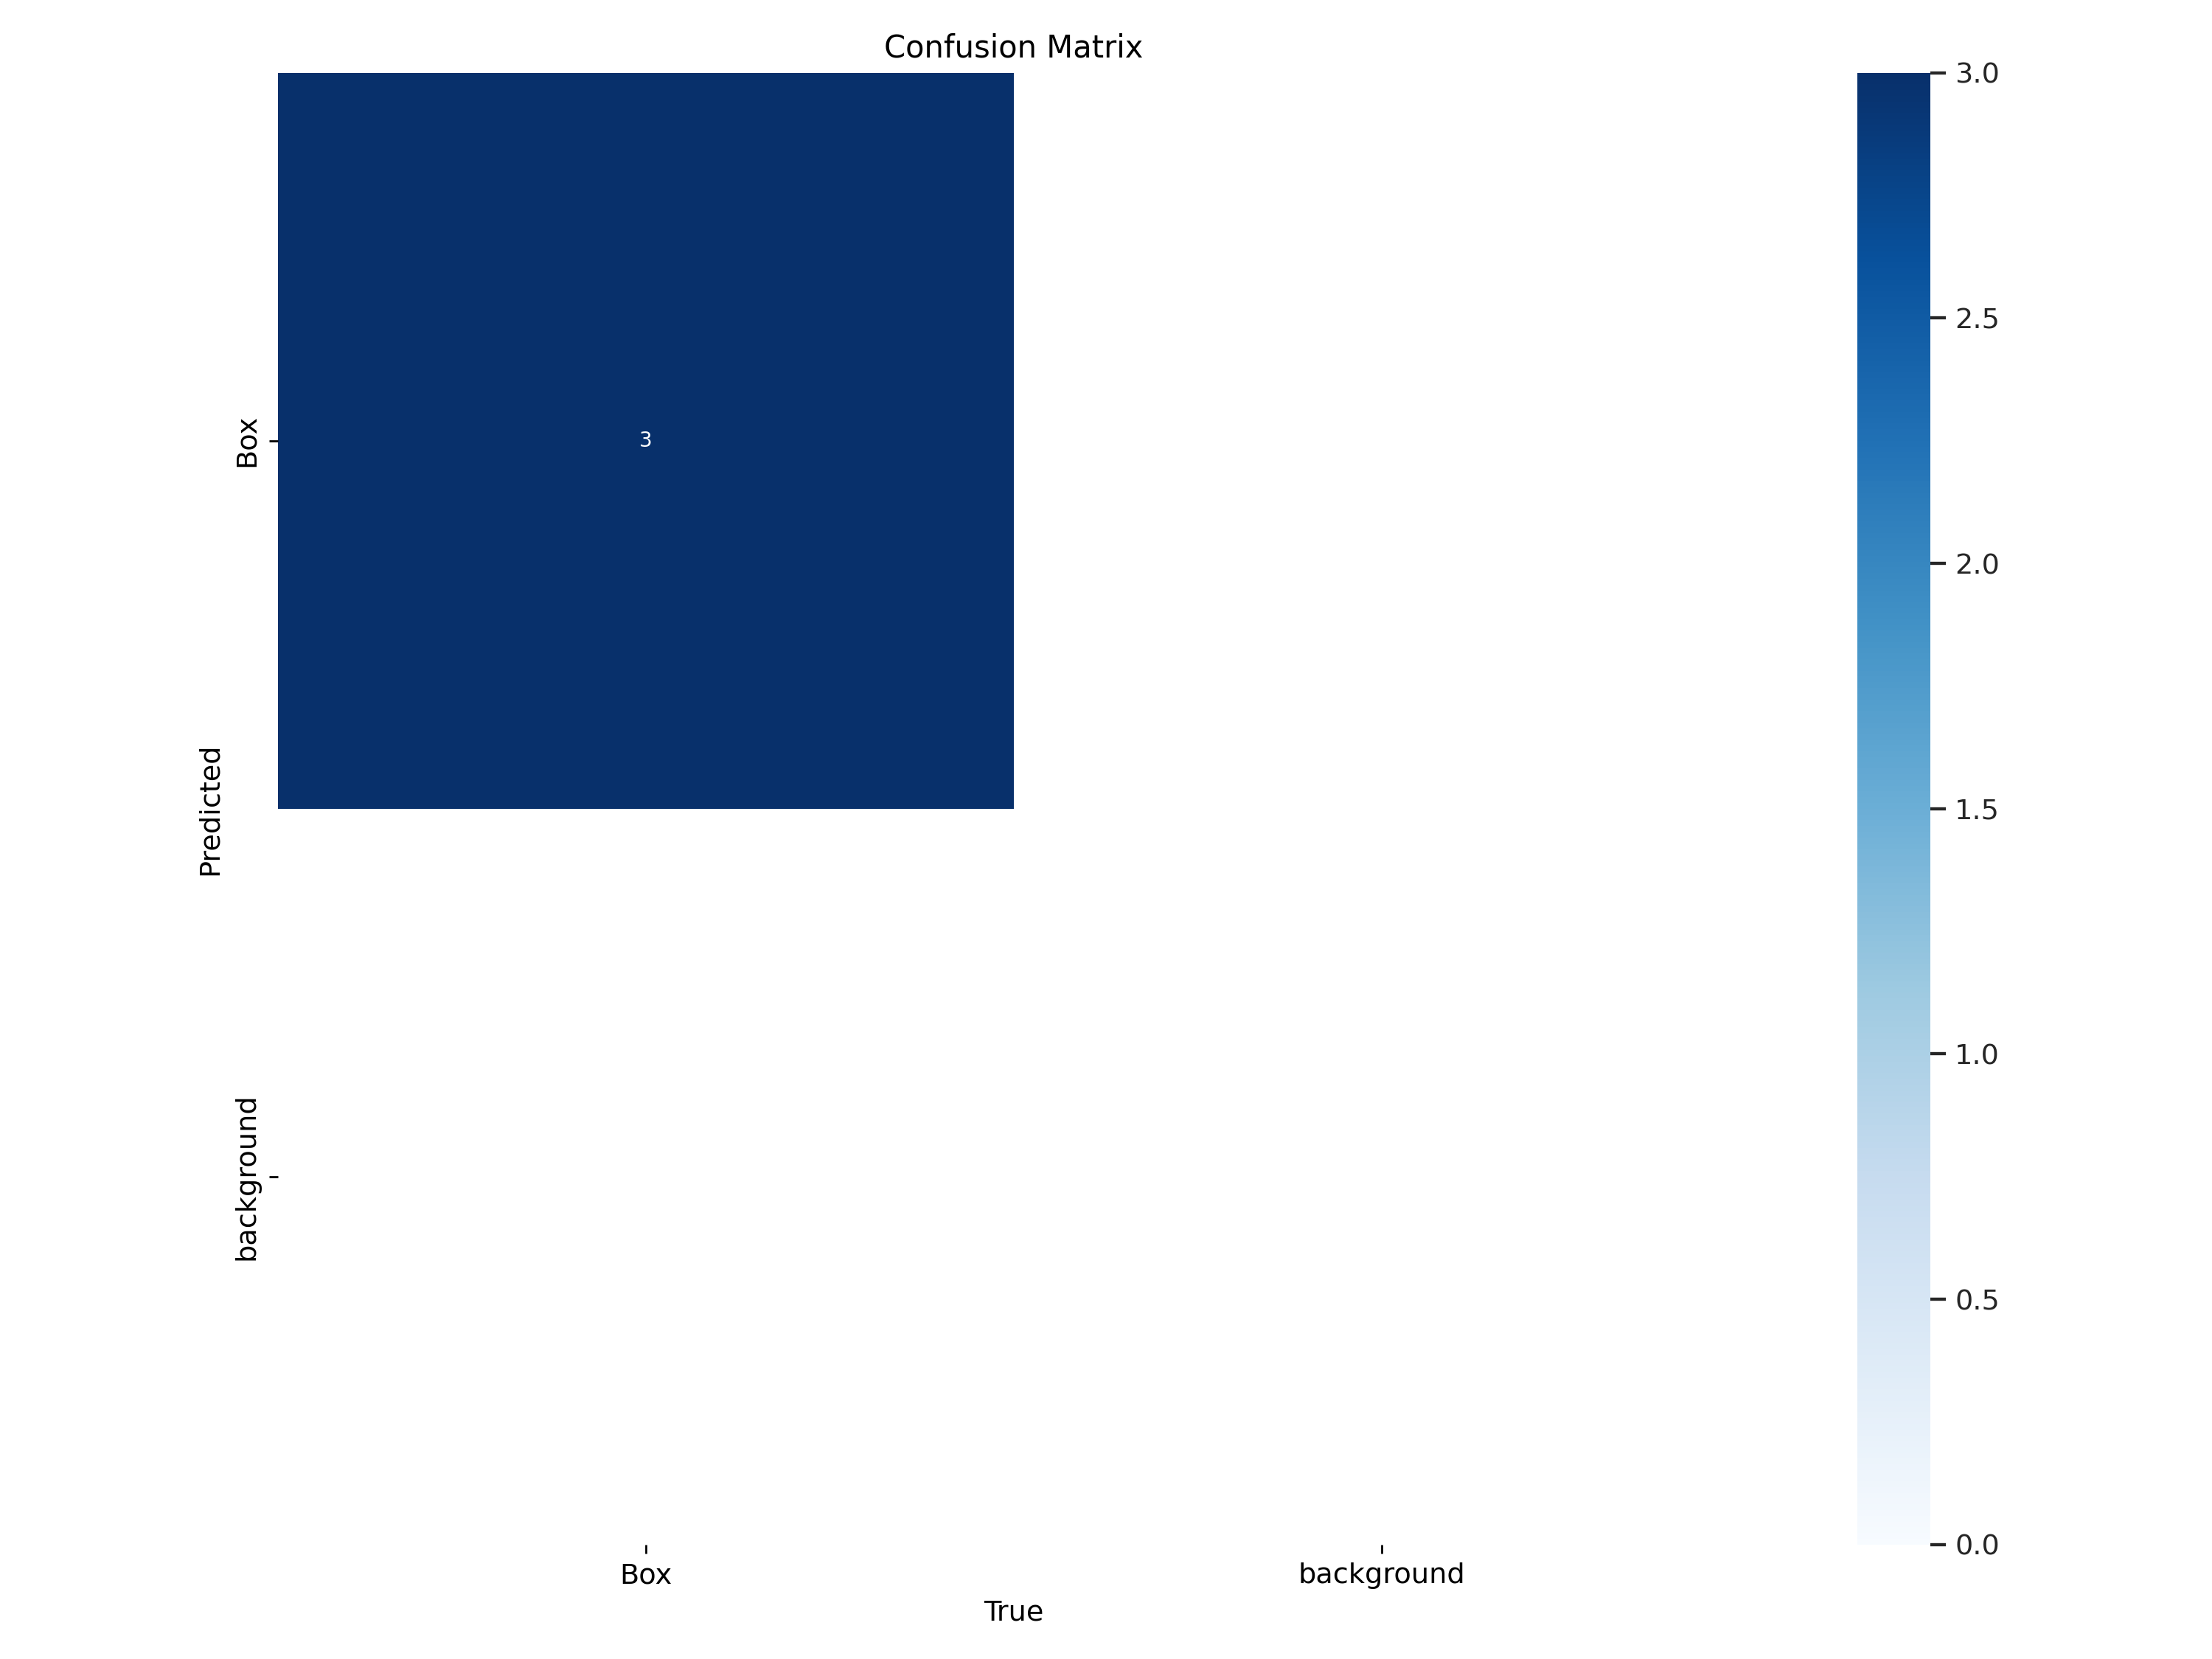

In [11]:
# Displaying the confusion matrix image using the 'Image' module.
Image(filename='/content/runs/detect/train6/confusion_matrix.png', width=600)

## Displaying Training Results

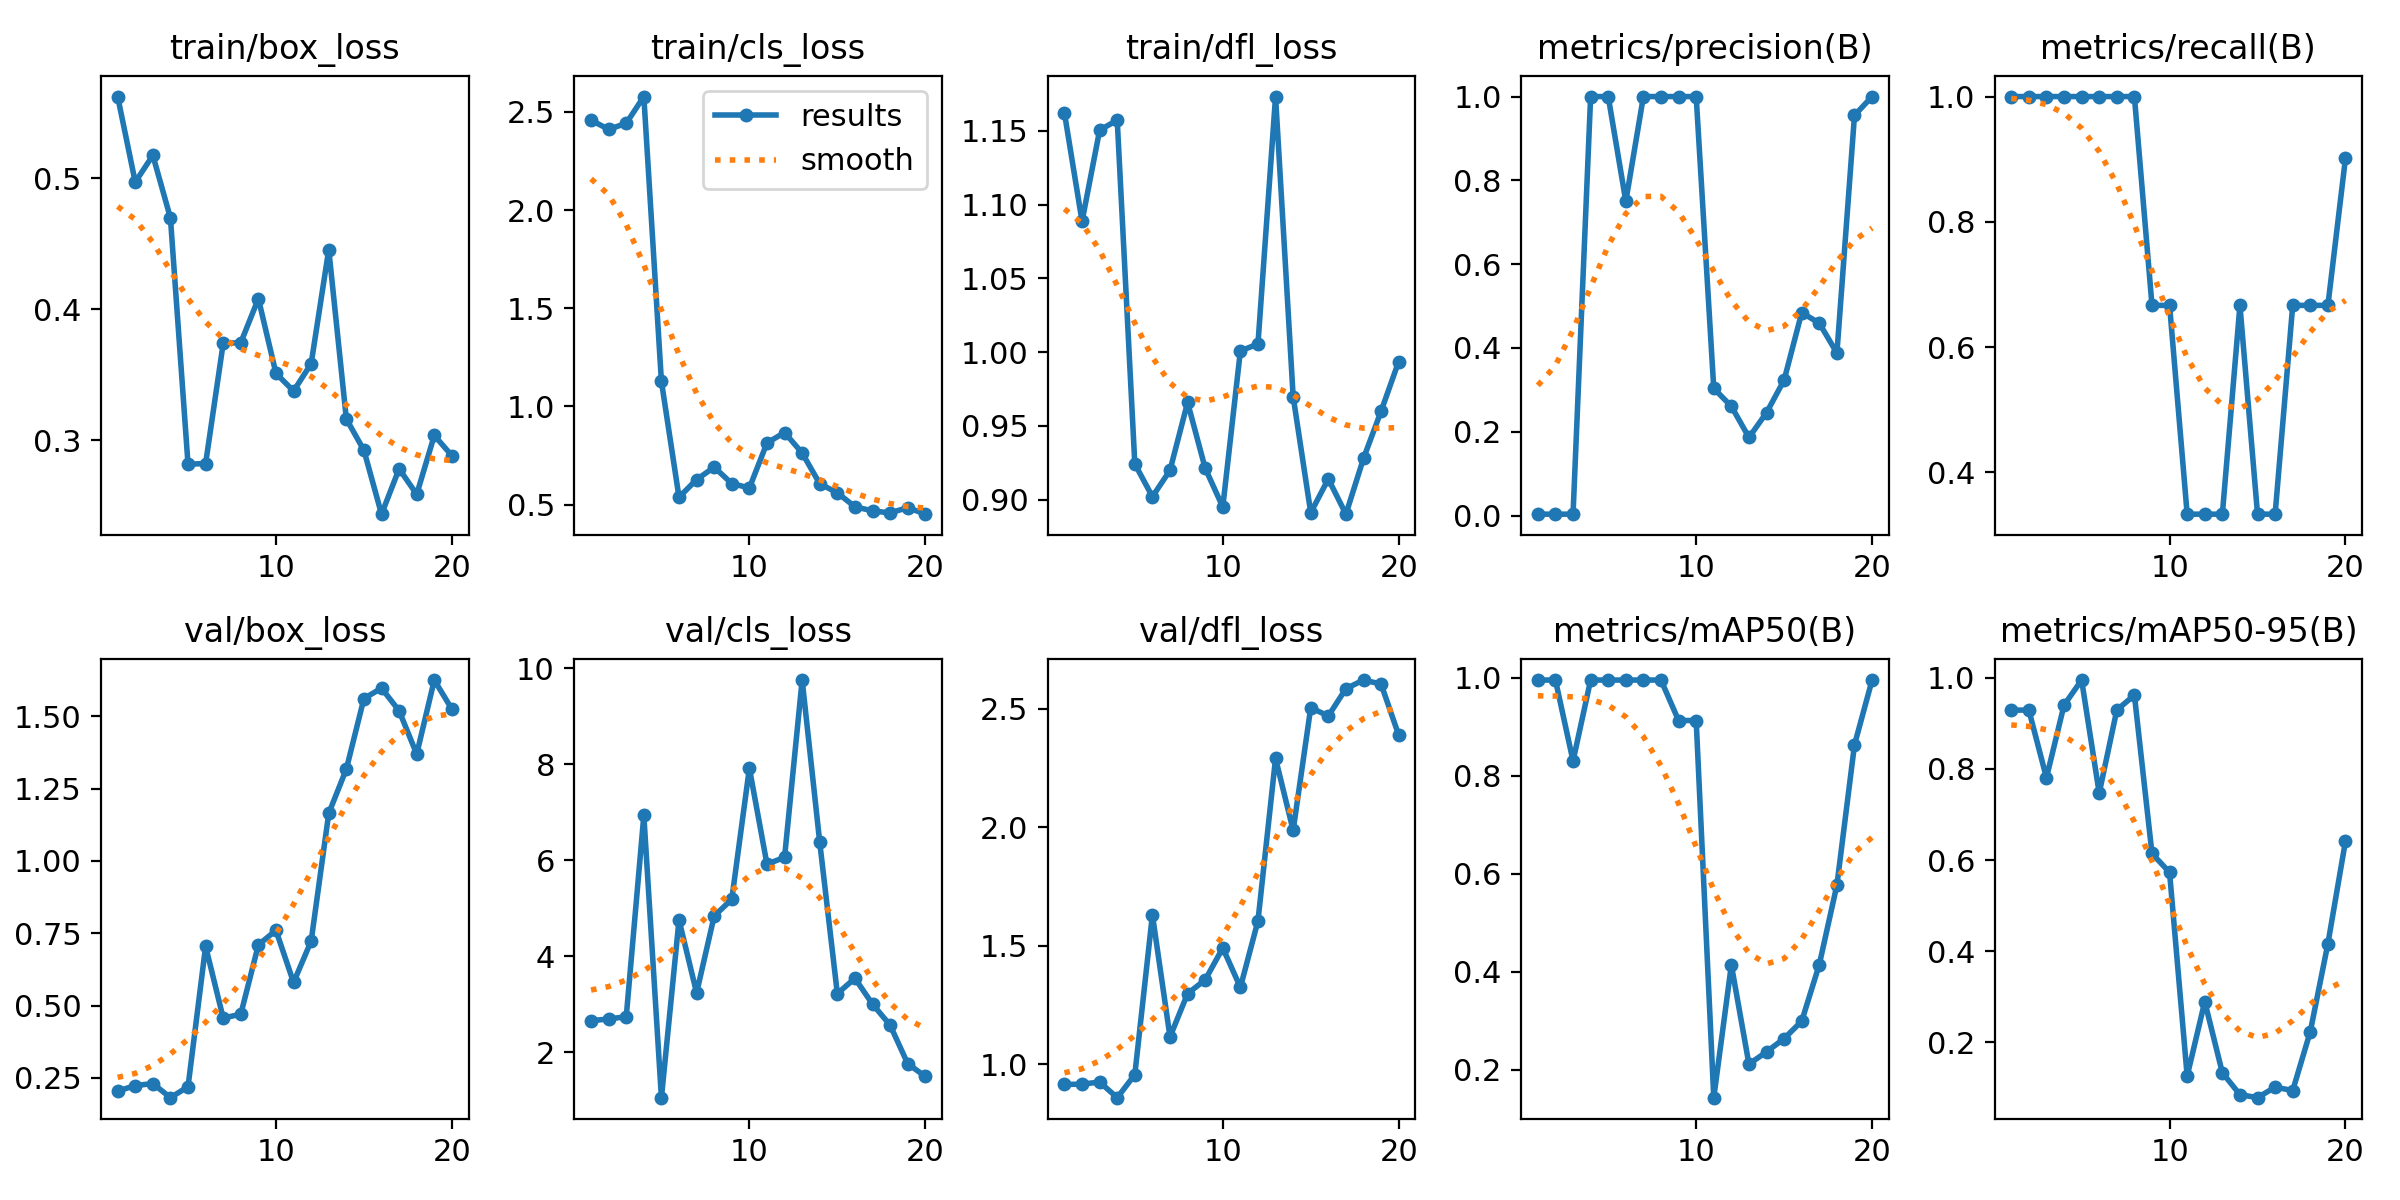

In [12]:
# Displaying the training results image using the 'Image' module.
Image(filename='/content/runs/detect/train6/results.png', width=600)

## YOLOv8 Validation Task

In [13]:
# Initiating YOLOv8 validation task using the validation dataset and model weights.
!yolo task=detect mode=val model=/content/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Crocomarine-Project-4/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.34it/s]
                   all          3          3      0.985          1      0.995      0.995
Speed: 0.3ms preprocess, 50.6ms inference, 0.0ms loss, 170.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## YOLOv8 Prediction Task

In [14]:
# Initiating YOLOv8 prediction task using the trained YOLOv8 model on the test dataset.
!yolo task=detect mode=predict model=/content/runs/detect/train6/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/3 /content/Crocomarine-Project-4/test/images/1_jpeg.rf.7f5bcfb61be9f532b99a995de07f3471.jpg: 640x640 1 Box, 37.1ms
image 2/3 /content/Crocomarine-Project-4/test/images/2_jpeg.rf.881e1d2ef620af7ffbe89f0dd4f85293.jpg: 640x640 1 Box, 37.1ms
image 3/3 /content/Crocomarine-Project-4/test/images/3_jpeg.rf.476fc2d34c0b67d37593e56f9e491e1a.jpg: 640x640 1 Box, 37.0ms
Speed: 2.3ms preprocess, 37.1ms inference, 188.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Displaying Predicted Images

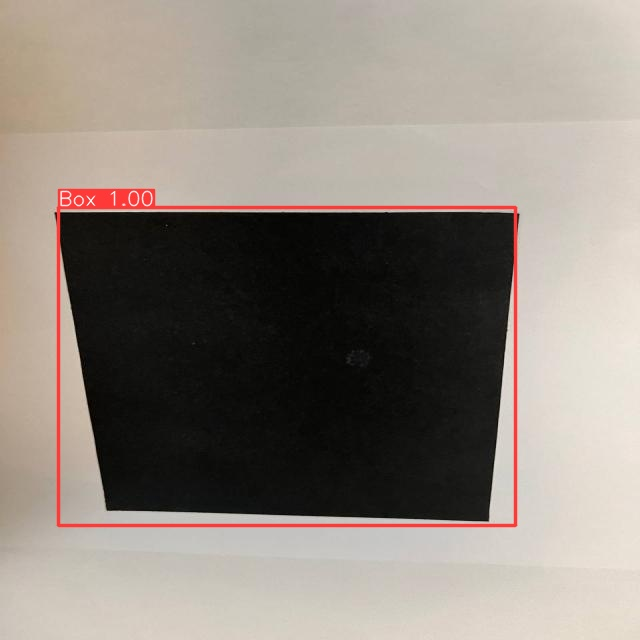

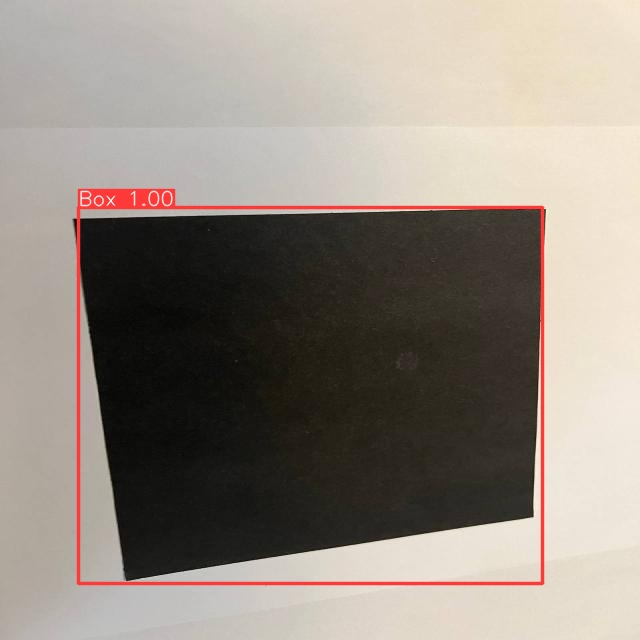

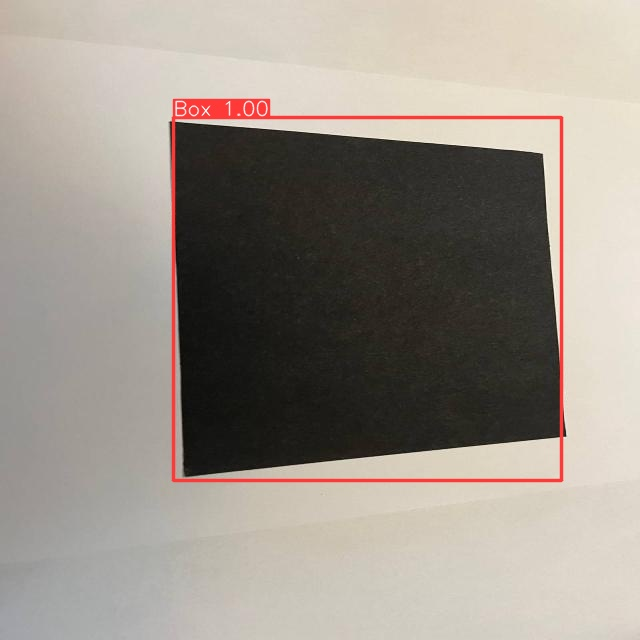

In [15]:
# Looping through predicted image files and displaying them.
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")